## Loading Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Required Files

- Whether a customer agrees to the term-deposit or not is based on various factors like job, education, loan details, socio-economic details, etc.
- Hence, all the files consisting of those details are loaded.

In [3]:
df_customer_details = pd.read_csv('Customer_and_bank details_p1.csv')
df_social_economic = pd.read_csv('Customer_social_economic_data_p1.csv')
df_campaign_details = pd.read_csv('Customer_campaign_details_p1.csv')
df_response_data = pd.read_csv('Customer_Response_data_p1.csv')

## Merging The Dataframes

- The details are present in separate files.
- To ease operations, we merge them into a single dataframe.
- The 'Customer_id' column is common in all 4 dataframes.
- Hence, it is used as a key for merging, meaning all columns are merged corresponding to the 'Customer_id'.

In [4]:
# Merge datasets on 'Customer_id' (assuming it's the common key)
df_merged = df_customer_details \
    .merge(df_social_economic, on='Customer_id') \
    .merge(df_campaign_details, on='Customer_id') \
    .merge(df_response_data, on='Customer_id')

## Saving The Dataframe To A .csv File

In [5]:
df_merged.to_csv('dataset.csv', index=False)

## Loading The Merged File

In [6]:
dataset = pd.read_csv('dataset.csv')

C:\Users\ishit\AppData\Local\Temp\ipykernel_15088\151985428.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('dataset.csv')


#### Printing The Dataset

In [7]:
dataset

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,2,S16,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,2,S16,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,44,technician,married,professional.course,no,no,no,4,S17,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


#### Printing The Datatype Of Each Column

In [8]:
dataset.dtypes

Customer_id         int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
Region_Code        object
State_Code         object
City_Code          object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
y                  object
dtype: object

- Region_Code, State_Code and City_Code do not give us any information.
- The dataset would be more meaningful if instead of codes, we had their names.
- The names of region can be extracted from Region_code_master.csv file.
- The names of states can be extracted from State_master.csv file.
- The names of city can be extracted from City_master.csv file.

## Checking For Null Values In The Region_Code Column

- Here, we check for values that are present in the Region_Code column of dataset but are not in the Region_Code column of region_master.

In [9]:
# Loading the Region_code_master.csv file
region_master = pd.read_csv('Region_code_master.csv')
region_master.dtypes

Region_Name    object
Region_Code     int64
dtype: object

- Since, datatype of Region_Code in dataset is object and that of Region_Code in region_master is int64, comparison can't be made directly.
- We convert the Region_code in dataset to int64 and then find the unmatched codes, if any.

In [10]:
# Convert region_code in dataset to integers
dataset['Region_Code'] = pd.to_numeric(dataset['Region_Code'], errors='coerce')

# Extract unique region codes from dataset and region_master
dataset_codes = set(dataset['Region_Code'].unique())
region_master_codes = set(region_master['Region_Code'].unique())

# Find region codes in dataset that are not in region_master
unmatched_codes = dataset_codes - region_master_codes

if unmatched_codes:
    print("These region codes in dataset are not found in region_master:")
    print(unmatched_codes)
else:
    print("All region codes in dataset are valid and found in region_master.")

These region codes in dataset are not found in region_master:
{nan}


## Checking For Null Values In The State_Code Column

- Once again we check for any unmatched codes.

In [11]:
# Loading the State_Master.csv file
state_master = pd.read_csv('State_Master.csv')
state_master.dtypes

State_Code     object
State_Name     object
Region_Code     int64
dtype: object

- Here, the datatypes of State_code in dataset and state_master are same, i.e. object.
- Hence, there is no need for convertion. We can directly compare.

In [12]:
# Extract unique state codes from dataset and state_master
dataset_codes = set(dataset['State_Code'].unique())
state_master_codes = set(state_master['State_Code'].unique())

# Find state codes in dataset that are not in state_master
unmatched_codes = dataset_codes - state_master_codes

if unmatched_codes:
    print("These state codes in dataset are not found in state_master:")
    print(unmatched_codes)
else:
    print("All state codes in dataset are valid and found in state_master.")

All state codes in dataset are valid and found in state_master.


## Checking For Null Values In The City_Code Column

In [13]:
# Loading the State_Master.csv file
city_master = pd.read_csv('City_Master.csv')
city_master.dtypes

City_Code     object
City_Name     object
State_Code    object
dtype: object

In [14]:
# Extract unique state codes from dataset and state_master
dataset_codes = set(dataset['City_Code'].unique())
city_master_codes = set(city_master['City_Code'].unique())

# Find state codes in dataset that are not in state_master
unmatched_codes = dataset_codes - city_master_codes

if unmatched_codes:
    print("These city codes in dataset are not found in city_master:")
    print(unmatched_codes)
else:
    print("All city codes in dataset are valid and found in city_master.")

All city codes in dataset are valid and found in city_master.


- Region_Code has missing values whereas State_Code and City_Code do not.
- Hence, we can first merge State_Names and City_Names in the dataset.
- Since, State_Master.csv already has a Region_Code column, we can ignore the Region_Code column in dataset and extract region names from state_master.

## Merging State Names With Dataset

In [15]:
dataset.drop('Region_Code', axis=1, inplace=True)

# Perform the merge operation
dataset = dataset.merge(state_master, on='State_Code', how='left')
dataset.drop('State_Code', axis=1, inplace=True)
dataset

,Customer_id,age,job,marital,education,default,housing,loan,City_Code,emp.var.rate,...,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,Region_Code
0,1,56,services,married,high.school,no,no,yes,C1,1.1,...,may,mon,307,1,999,0,nonexistent,no,Kentucky,3
1,2,45,services,married,basic.9y,unknown,no,no,C1,1.1,...,may,mon,198,1,999,0,nonexistent,no,Kentucky,3
2,3,59,admin.,married,professional.course,no,no,no,C2,1.1,...,may,mon,139,1,999,0,nonexistent,no,California,4
3,4,41,blue-collar,married,unknown,unknown,no,no,C3,1.1,...,may,mon,217,1,999,0,nonexistent,no,Florida,3
4,5,24,technician,single,professional.course,no,yes,no,C3,1.1,...,may,mon,380,1,999,0,nonexistent,no,Florida,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,C21,-1.1,...,nov,fri,334,1,999,0,nonexistent,yes,New York,2
37080,37081,46,blue-collar,married,professional.course,no,no,no,C21,-1.1,...,nov,fri,383,1,999,0,nonexistent,no,New York,2
37081,37082,56,retired,married,university.degree,no,yes,no,C21,-1.1,...,nov,fri,189,2,999,0,nonexistent,no,New York,2
37082,37083,44,technician,married,professional.course,no,no,no,C49,-1.1,...,nov,fri,442,1,999,0,nonexistent,yes,Arizona,4


## Merging City Names With Dataset

In [16]:
city_master.drop('State_Code', axis=1, inplace=True)

dataset = dataset.merge(city_master, on='City_Code', how='left')
dataset.drop('City_Code', axis=1, inplace=True)
dataset

,Customer_id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,...,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,Region_Code,City_Name
0,1,56,services,married,high.school,no,no,yes,1.1,93.994,...,mon,307,1,999,0,nonexistent,no,Kentucky,3,Henderson
1,2,45,services,married,basic.9y,unknown,no,no,1.1,93.994,...,mon,198,1,999,0,nonexistent,no,Kentucky,3,Henderson
2,3,59,admin.,married,professional.course,no,no,no,1.1,93.994,...,mon,139,1,999,0,nonexistent,no,California,4,Los Angeles
3,4,41,blue-collar,married,unknown,unknown,no,no,1.1,93.994,...,mon,217,1,999,0,nonexistent,no,Florida,3,Fort Lauderdale
4,5,24,technician,single,professional.course,no,yes,no,1.1,93.994,...,mon,380,1,999,0,nonexistent,no,Florida,3,Fort Lauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,-1.1,94.767,...,fri,334,1,999,0,nonexistent,yes,New York,2,New York City
37080,37081,46,blue-collar,married,professional.course,no,no,no,-1.1,94.767,...,fri,383,1,999,0,nonexistent,no,New York,2,New York City
37081,37082,56,retired,married,university.degree,no,yes,no,-1.1,94.767,...,fri,189,2,999,0,nonexistent,no,New York,2,New York City
37082,37083,44,technician,married,professional.course,no,no,no,-1.1,94.767,...,fri,442,1,999,0,nonexistent,yes,Arizona,4,Scottsdale


## Merging Region Names With Dataset

In [17]:
dataset = dataset.merge(region_master, on='Region_Code', how='left')
dataset.drop('Region_Code', axis=1, inplace=True)
dataset

,Customer_id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,...,day_of_week,duration,campaign,pdays,previous,poutcome,y,State_Name,City_Name,Region_Name
0,1,56,services,married,high.school,no,no,yes,1.1,93.994,...,mon,307,1,999,0,nonexistent,no,Kentucky,Henderson,South
1,2,45,services,married,basic.9y,unknown,no,no,1.1,93.994,...,mon,198,1,999,0,nonexistent,no,Kentucky,Henderson,South
2,3,59,admin.,married,professional.course,no,no,no,1.1,93.994,...,mon,139,1,999,0,nonexistent,no,California,Los Angeles,West
3,4,41,blue-collar,married,unknown,unknown,no,no,1.1,93.994,...,mon,217,1,999,0,nonexistent,no,Florida,Fort Lauderdale,South
4,5,24,technician,single,professional.course,no,yes,no,1.1,93.994,...,mon,380,1,999,0,nonexistent,no,Florida,Fort Lauderdale,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,-1.1,94.767,...,fri,334,1,999,0,nonexistent,yes,New York,New York City,East
37080,37081,46,blue-collar,married,professional.course,no,no,no,-1.1,94.767,...,fri,383,1,999,0,nonexistent,no,New York,New York City,East
37081,37082,56,retired,married,university.degree,no,yes,no,-1.1,94.767,...,fri,189,2,999,0,nonexistent,no,New York,New York City,East
37082,37083,44,technician,married,professional.course,no,no,no,-1.1,94.767,...,fri,442,1,999,0,nonexistent,yes,Arizona,Scottsdale,West


## Rearranging Columns In Datasets

In [21]:
new_order = ['Customer_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'City_Name', 'State_Name', 'Region_Name', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
dataset = dataset[new_order]
dataset

,Customer_id,age,job,marital,education,default,housing,loan,City_Name,State_Name,...,nr.employed,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,56,services,married,high.school,no,no,yes,Henderson,Kentucky,...,5191.0,telephone,may,mon,307,1,999,0,nonexistent,no
1,2,45,services,married,basic.9y,unknown,no,no,Henderson,Kentucky,...,5191.0,telephone,may,mon,198,1,999,0,nonexistent,no
2,3,59,admin.,married,professional.course,no,no,no,Los Angeles,California,...,5191.0,telephone,may,mon,139,1,999,0,nonexistent,no
3,4,41,blue-collar,married,unknown,unknown,no,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,217,1,999,0,nonexistent,no
4,5,24,technician,single,professional.course,no,yes,no,Fort Lauderdale,Florida,...,5191.0,telephone,may,mon,380,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37080,73,retired,married,professional.course,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,334,1,999,0,nonexistent,yes
37080,37081,46,blue-collar,married,professional.course,no,no,no,New York City,New York,...,4963.6,cellular,nov,fri,383,1,999,0,nonexistent,no
37081,37082,56,retired,married,university.degree,no,yes,no,New York City,New York,...,4963.6,cellular,nov,fri,189,2,999,0,nonexistent,no
37082,37083,44,technician,married,professional.course,no,no,no,Scottsdale,Arizona,...,4963.6,cellular,nov,fri,442,1,999,0,nonexistent,yes


## Saving The Dataframe To dataset.csv

In [22]:
dataset.to_csv('dataset.csv', index=False)

## Type Of Job

### Plotting Job Types

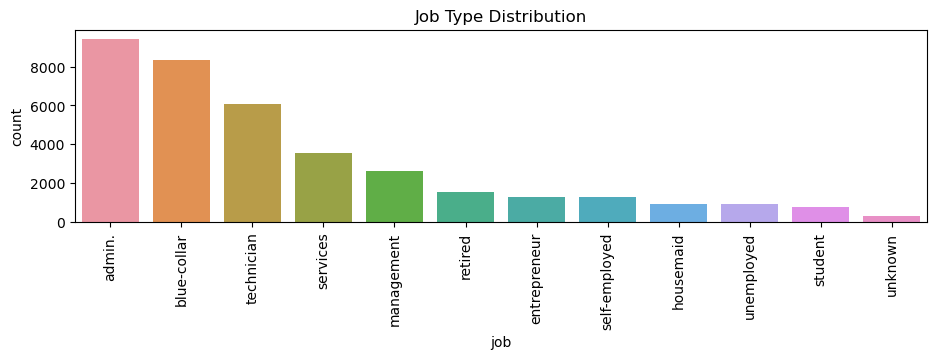

In [23]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Job Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['job'],order=dataset['job'].value_counts().index)
plt.show()

### Subscription Rate Based On Job

Text(0.5, 1.0, 'Subscription Rate by Job Type')

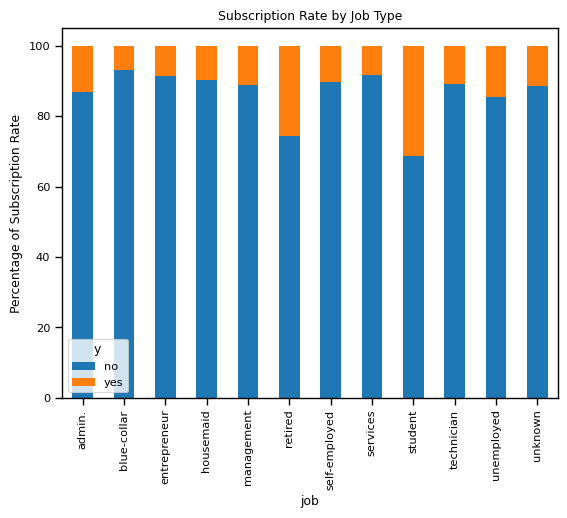

In [24]:
diff_categ_count=dataset['job'].value_counts()
group_table=dataset.groupby(['job','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Subscription Rate by Job Type')

## Marital Status

### Plotting Marital Status

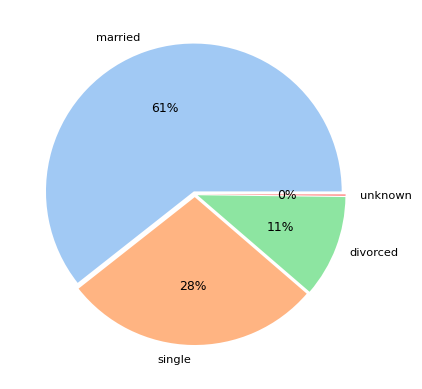

In [25]:
palette_color = sns.color_palette('pastel')[0:5]
explode = [0.02, 0.02, 0.02, 0.02]
plt.pie(dataset['marital'].value_counts().values, labels=dataset['marital'].value_counts().index, colors=palette_color, autopct='%.0f%%', explode=explode)
plt.show()

### Subscription Rate Based On Marital

Text(0.5, 1.0, 'Subscription Rate by Marital Status')

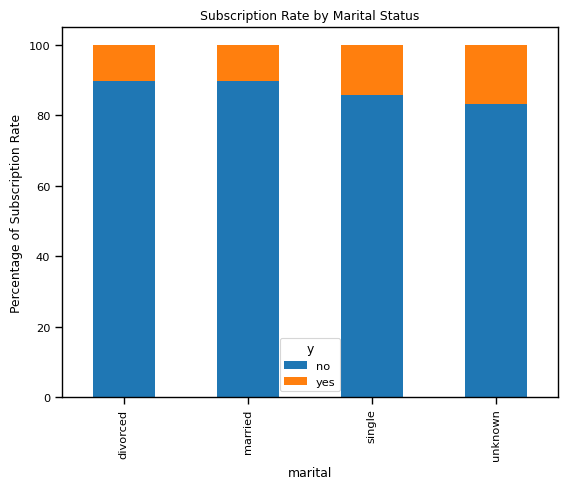

In [26]:
diff_categ_count=dataset['marital'].value_counts()
group_table=dataset.groupby(['marital','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Subscription Rate by Marital Status')

## Education Type 

### Plotting Education Type

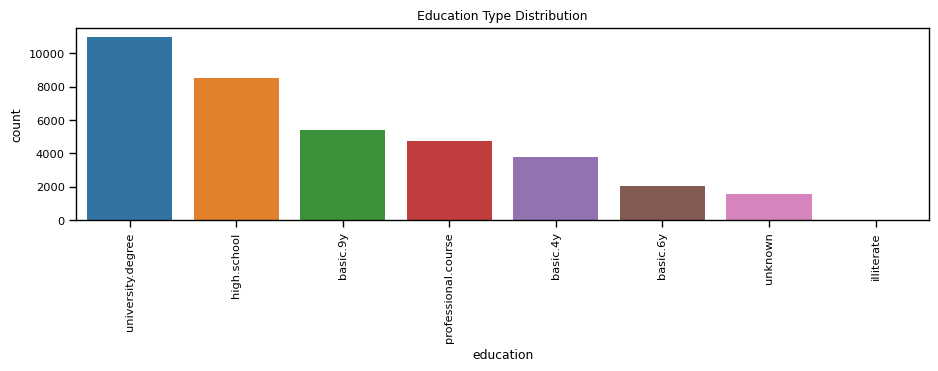

In [27]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Education Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['education'],order=dataset['education'].value_counts().index)
plt.show()

### Subscription Rates Based On Education

Text(0.5, 1.0, 'Subscription Rate by Education Type')

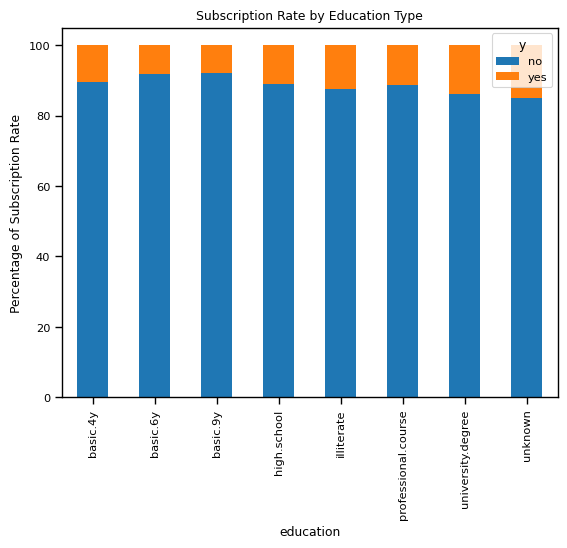

In [28]:
diff_categ_count=dataset['education'].value_counts()
group_table=dataset.groupby(['education','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Subscription Rate by Education Type')

## Contact Type

### Plotting Contact Type

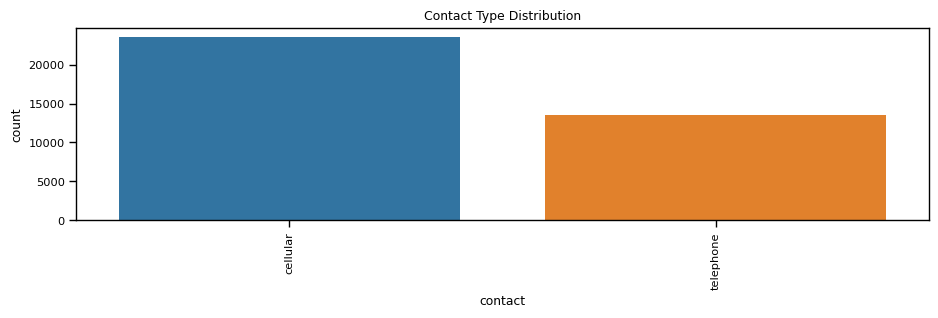

In [29]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Contact Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['contact'],order=dataset['contact'].value_counts().index)
plt.show()

### Subscription Rates Based On Contact

Text(0.5, 1.0, 'Subscription Rate by Contact Type')

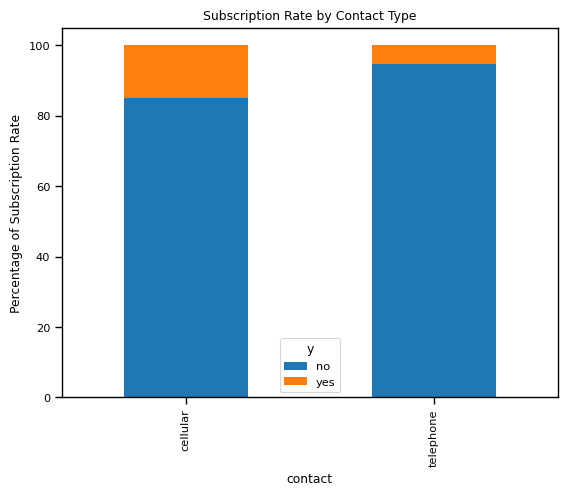

In [30]:
diff_categ_count=dataset['contact'].value_counts()
group_table=dataset.groupby(['contact','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Subscription Rate by Contact Type')

## Month Type

### Plotting Month Type Distribution

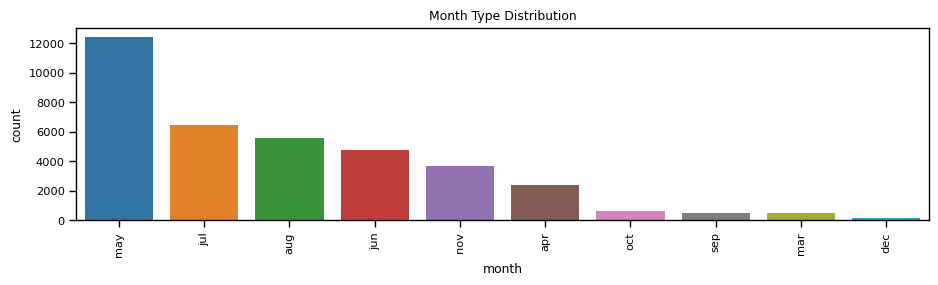

In [31]:
plt.figure(figsize=(11, 2.5))                                                                                                                                                                                                
plt.title('Month Type Distribution')
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=0.93)   
sns.countplot(x=dataset['month'],order=dataset['month'].value_counts().index)
plt.show()

### Subscription Rates Based On Month

Text(0.5, 1.0, 'Subscription Rate by Month Type')

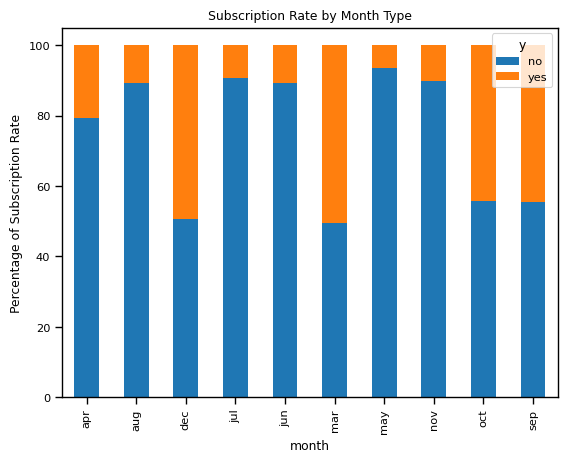

In [32]:
diff_categ_count=dataset['month'].value_counts()
group_table=dataset.groupby(['month','y']).size().astype(float)
for categ in group_table.index.levels[0]:
    for income in group_table[categ].index:
        group_table[categ][income]=group_table[categ][income]/diff_categ_count[categ]*100
group_table.unstack().plot(kind='bar',stacked=True)
plt.ylabel('Percentage of Subscription Rate')
plt.title('Subscription Rate by Month Type')